# Analyse données AGRESTE

In [1]:
import zipfile
import numpy as np
import pandas as pd
from IPython.core.display import display


## AGRESTE

### Nb d'actifs & nb exploitations - FICHIER FDS_G_2005.zip

In [3]:
d = pd.read_csv(
        zipfile.ZipFile("../../crater-data-sources/agreste/1970-2010/FDS_G_2005.zip", 'r').open('FDS_G_2005_2010.txt'),
        sep=';')
d.head(3)

/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


NOM  ANNREF FRANCE         FRDOM        REGION           DEP  \
0  G_2005    2010     FR  ............  ............  ............   
1  G_2005    2010     FR  ............  ............  ............   
2  G_2005    2010     FR  ............  ............  ............   

            COM              G_2005_DIM1  G_2005_MOD_DIM1  \
0  ............  Champ des exploitations                1   
1  ............  Champ des exploitations                1   
2  ............  Champ des exploitations                1   

                                     G_2005_LIB_DIM1  \
0  Ensemble des exploitations (hors pacages colle...   
1  Ensemble des exploitations (hors pacages colle...   
2  Ensemble des exploitations (hors pacages colle...   

                G_2005_DIM2  G_2005_MOD_DIM2 G_2005_LIB_DIM2 G_2005_DIM3  \
0  Lien avec l'exploitation                1        Ensemble  Indicateur   
1  Lien avec l'exploitation                1        Ensemble  Indicateur   
2  Lien avec l'exploitation                1        Ensemble  Indicateur   

   G_2005_MOD_DIM3                 G_2005_LIB_DIM3       VALEUR QUALITE  
0                1          Nombre d'exploitations   514694.000     OUI  
1                2             Nombre de personnes  1012750.000     OUI  
2                3  Unités de travail annuel (UTA)   691768.875     OUI

In [22]:
d.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105035 entries, 0 to 1105034
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   NOM              1105035 non-null  object 
 1   ANNREF           1105035 non-null  int64  
 2   FRANCE           1105035 non-null  object 
 3   FRDOM            1105035 non-null  object 
 4   REGION           1105035 non-null  object 
 5   DEP              1105035 non-null  object 
 6   COM              1105035 non-null  object 
 7   G_2005_DIM1      1105035 non-null  object 
 8   G_2005_MOD_DIM1  1105035 non-null  int64  
 9   G_2005_LIB_DIM1  1105035 non-null  object 
 10  G_2005_DIM2      1105035 non-null  object 
 11  G_2005_MOD_DIM2  1105035 non-null  int64  
 12  G_2005_LIB_DIM2  1105035 non-null  object 
 13  G_2005_DIM3      1105035 non-null  object 
 14  G_2005_MOD_DIM3  1105035 non-null  int64  
 15  G_2005_LIB_DIM3  1105035 non-null  object 
 16  VALEUR           4

#### Classification sur les 3 niveaux DIM1, DIM2, DIM3

In [59]:
# Niveau DIM1
display(d.loc[:, ['G_2005_MOD_DIM1', 'G_2005_LIB_DIM1']].value_counts())

G_2005_MOD_DIM1  G_2005_LIB_DIM1                                     
1                Ensemble des exploitations (hors pacages collectifs)    431880
3                Moyennes et grandes exploitations                       406041
2                Petites exploitations                                   267114
dtype: int64

In [60]:
# Niveau DIM2
display(d.loc[:, ['G_2005_MOD_DIM2', 'G_2005_LIB_DIM2']].value_counts())

G_2005_MOD_DIM2  G_2005_LIB_DIM2                                      
1                Ensemble                                                 301770
2                Chefs d'exploitation et coexploitants                    301770
3                Conjoints non coexploitants actifs sur l'exploitation    221355
5                Salariés permanents hors famille                         142803
4                Autres actifs familiaux                                  137337
dtype: int64

In [68]:
# Niveau DIM3
display(d.loc[:, ['G_2005_MOD_DIM3', 'G_2005_LIB_DIM3']].value_counts())

G_2005_MOD_DIM3  G_2005_LIB_DIM3               
1                Nombre d'exploitations            368345
2                Nombre de personnes               368345
3                Unités de travail annuel (UTA)    368345
dtype: int64

#### Indicateur nombre d'actifs agricoles

In [23]:
actifs = d.loc[(d['G_2005_MOD_DIM1'] == 1)
               & (d['G_2005_MOD_DIM2'] == 1)
               & (d['G_2005_MOD_DIM3'] == 2)
                & (d['COM'] != '............'),:]
actifs

NOM  ANNREF FRANCE  FRDOM REGION  DEP    COM  \
181      G_2005    2010     FR    DOM   NR01  971  97101   
226      G_2005    2010     FR    DOM   NR01  971  97102   
271      G_2005    2010     FR    DOM   NR01  971  97103   
316      G_2005    2010     FR    DOM   NR01  971  97104   
361      G_2005    2010     FR    DOM   NR01  971  97105   
...         ...     ...    ...    ...    ...  ...    ...   
1104958  G_2005    2010     FR  METRO   NR94   2B  2B354   
1104970  G_2005    2010     FR  METRO   NR94   2B  2B355   
1104988  G_2005    2010     FR  METRO   NR94   2B  2B356   
1105006  G_2005    2010     FR  METRO   NR94   2B  2B361   
1105018  G_2005    2010     FR  METRO   NR94   2B  2B365   

                     G_2005_DIM1  G_2005_MOD_DIM1  \
181      Champ des exploitations                1   
226      Champ des exploitations                1   
271      Champ des exploitations                1   
316      Champ des exploitations                1   
361      Champ des exploitations                1   
...                          ...              ...   
1104958  Champ des exploitations                1   
1104970  Champ des exploitations                1   
1104988  Champ des exploitations                1   
1105006  Champ des exploitations                1   
1105018  Champ des exploitations                1   

                                           G_2005_LIB_DIM1  \
181      Ensemble des exploitations (hors pacages colle...   
226      Ensemble des exploitations (hors pacages colle...   
271      Ensemble des exploitations (hors pacages colle...   
316      Ensemble des exploitations (hors pacages colle...   
361      Ensemble des exploitations (hors pacages colle...   
...                                                    ...   
1104958  Ensemble des exploitations (hors pacages colle...   
1104970  Ensemble des exploitations (hors pacages colle...   
1104988  Ensemble des exploitations (hors pacages colle...   
1105006  Ensemble des exploitations (hors pacages colle...   
1105018  Ensemble des exploitations (hors pacages colle...   

                      G_2005_DIM2  G_2005_MOD_DIM2 G_2005_LIB_DIM2  \
181      Lien avec l'exploitation                1        Ensemble   
226      Lien avec l'exploitation                1        Ensemble   
271      Lien avec l'exploitation                1        Ensemble   
316      Lien avec l'exploitation                1        Ensemble   
361      Lien avec l'exploitation                1        Ensemble   
...                           ...              ...             ...   
1104958  Lien avec l'exploitation                1        Ensemble   
1104970  Lien avec l'exploitation                1        Ensemble   
1104988  Lien avec l'exploitation                1        Ensemble   
1105006  Lien avec l'exploitation                1        Ensemble   
1105018  Lien avec l'exploitation                1        Ensemble   

        G_2005_DIM3  G_2005_MOD_DIM3      G_2005_LIB_DIM3  VALEUR QUALITE  
181      Indicateur                2  Nombre de personnes   275.0     OUI  
226      Indicateur                2  Nombre de personnes   551.0     OUI  
271      Indicateur                2  Nombre de personnes   267.0     OUI  
316      Indicateur                2  Nombre de personnes   257.0     OUI  
361      Indicateur                2  Nombre de personnes     NaN     OUI  
...             ...              ...                  ...     ...     ...  
1104958  Indicateur                2  Nombre de personnes     NaN     NON  
1104970  Indicateur                2  Nombre de personnes    18.0     OUI  
1104988  Indicateur                2  Nombre de personnes     3.0     OUI  
1105006  Indicateur                2  Nombre de personnes     5.0     OUI  
1105018  Indicateur                2  Nombre de personnes     4.0     OUI  

[35759 rows x 18 columns]

In [24]:
display(actifs['VALEUR'].value_counts(dropna=False))

NaN      8453
12.0      931
13.0      888
11.0      868
14.0      846
         ... 
689.0       1
266.0       1
316.0       1
639.0       1
183.0       1
Name: VALEUR, Length: 375, dtype: int64

In [26]:
# Analyse distribution des valeurs avec qualité = NON => la plupart ont une VALEUR=NaN, et on ne sait pas comment l'interpreter => on ne considere par ce champ QUALITE
display(actifs['QUALITE'].value_counts())
actifs_qualite_NON = actifs[actifs['QUALITE'] == 'NON']
display(f'Pour les lignes avec QUALITE=NON, il y en a {actifs_qualite_NON["VALEUR"].isna().sum()} avec VALEUR=NAN')

OUI    31808
NON     3951
Name: QUALITE, dtype: int64

'Pour les lignes avec QUALITE=NON, il y en a 3739 avec VALEUR=NAN'

NaN      8453
12.0      931
13.0      888
11.0      868
14.0      846
         ... 
689.0       1
266.0       1
316.0       1
639.0       1
183.0       1
Name: VALEUR, Length: 375, dtype: int64

count    27306.000000
mean        34.971728
std         53.120928
min          3.000000
1%           4.000000
10%          9.000000
20%         12.000000
30%         15.000000
40%         19.000000
50%         23.000000
60%         28.000000
70%         35.000000
80%         46.000000
90%         68.000000
99%        201.950000
max       2236.000000
Name: VALEUR, dtype: float64

<AxesSubplot:>

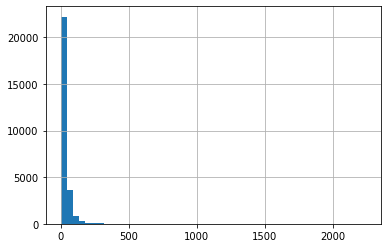

In [27]:
# Analyse distribution du champ VALEUR
display(actifs['VALEUR'].value_counts(dropna=False))
display(actifs['VALEUR'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]))
actifs['VALEUR'].hist(bins=50)



#### Indicateur nombre d'exploitations

In [29]:
exploit = d.loc[(d['G_2005_MOD_DIM1'] == 1)
               & (d['G_2005_MOD_DIM2'] == 1)
               & (d['G_2005_MOD_DIM3'] == 1)
                & (d['COM'] != '............'),:]

NaN       8445
6.0       1702
7.0       1674
5.0       1663
4.0       1527
          ... 
257.0        1
323.0        1
679.0        1
1086.0       1
148.0        1
Name: VALEUR, Length: 221, dtype: int64

count    27314.000000
mean        17.607015
std         26.396233
min          3.000000
1%           3.000000
10%          5.000000
20%          6.000000
30%          8.000000
40%         10.000000
50%         12.000000
60%         15.000000
70%         18.000000
80%         24.000000
90%         34.000000
99%         91.000000
max       1086.000000
Name: VALEUR, dtype: float64

<AxesSubplot:>

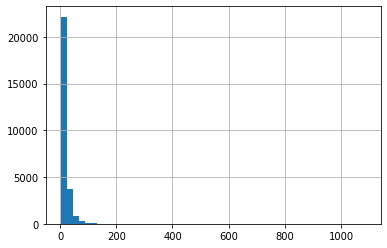

In [30]:
# Analyse distribution du champ VALEUR
display(exploit['VALEUR'].value_counts(dropna=False))
display(exploit['VALEUR'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]))
exploit['VALEUR'].hist(bins=50)

In [32]:
display(exploit[exploit['VALEUR'] > 500])

NOM  ANNREF FRANCE FRDOM REGION  DEP    COM              G_2005_DIM1  \
474   G_2005    2010     FR   DOM   NR01  971  97108  Champ des exploitations   
633   G_2005    2010     FR   DOM   NR01  971  97112  Champ des exploitations   
840   G_2005    2010     FR   DOM   NR01  971  97117  Champ des exploitations   
930   G_2005    2010     FR   DOM   NR01  971  97119  Champ des exploitations   
1197  G_2005    2010     FR   DOM   NR01  971  97128  Champ des exploitations   
1242  G_2005    2010     FR   DOM   NR01  971  97129  Champ des exploitations   
3393  G_2005    2010     FR   DOM   NR03  973  97311  Champ des exploitations   
3585  G_2005    2010     FR   DOM   NR03  973  97353  Champ des exploitations   
3654  G_2005    2010     FR   DOM   NR03  973  97357  Champ des exploitations   
3714  G_2005    2010     FR   DOM   NR03  973  97360  Champ des exploitations   
3768  G_2005    2010     FR   DOM   NR03  973  97362  Champ des exploitations   
4299  G_2005    2010     FR   DOM   NR04  974  97410  Champ des exploitations   
4389  G_2005    2010     FR   DOM   NR04  974  97412  Champ des exploitations   
4524  G_2005    2010     FR   DOM   NR04  974  97415  Champ des exploitations   
4569  G_2005    2010     FR   DOM   NR04  974  97416  Champ des exploitations   
4836  G_2005    2010     FR   DOM   NR04  974  97422  Champ des exploitations   

      G_2005_MOD_DIM1                                    G_2005_LIB_DIM1  \
474                 1  Ensemble des exploitations (hors pacages colle...   
633                 1  Ensemble des exploitations (hors pacages colle...   
840                 1  Ensemble des exploitations (hors pacages colle...   
930                 1  Ensemble des exploitations (hors pacages colle...   
1197                1  Ensemble des exploitations (hors pacages colle...   
1242                1  Ensemble des exploitations (hors pacages colle...   
3393                1  Ensemble des exploitations (hors pacages colle...   
3585                1  Ensemble des exploitations (hors pacages colle...   
3654                1  Ensemble des exploitations (hors pacages colle...   
3714                1  Ensemble des exploitations (hors pacages colle...   
3768                1  Ensemble des exploitations (hors pacages colle...   
4299                1  Ensemble des exploitations (hors pacages colle...   
4389                1  Ensemble des exploitations (hors pacages colle...   
4524                1  Ensemble des exploitations (hors pacages colle...   
4569                1  Ensemble des exploitations (hors pacages colle...   
4836                1  Ensemble des exploitations (hors pacages colle...   

                   G_2005_DIM2  G_2005_MOD_DIM2 G_2005_LIB_DIM2 G_2005_DIM3  \
474   Lien avec l'exploitation                1        Ensemble  Indicateur   
633   Lien avec l'exploitation                1        Ensemble  Indicateur   
840   Lien avec l'exploitation                1        Ensemble  Indicateur   
930   Lien avec l'exploitation                1        Ensemble  Indicateur   
1197  Lien avec l'exploitation                1        Ensemble  Indicateur   
1242  Lien avec l'exploitation                1        Ensemble  Indicateur   
3393  Lien avec l'exploitation                1        Ensemble  Indicateur   
3585  Lien avec l'exploitation                1        Ensemble  Indicateur   
3654  Lien avec l'exploitation                1        Ensemble  Indicateur   
3714  Lien avec l'exploitation                1        Ensemble  Indicateur   
3768  Lien avec l'exploitation                1        Ensemble  Indicateur   
4299  Lien avec l'exploitation                1        Ensemble  Indicateur   
4389  Lien avec l'exploitation                1        Ensemble  Indicateur   
4524  Lien avec l'exploitation                1        Ensemble  Indicateur   
4569  Lien avec l'exploitation                1        Ensemble  Indicateur   
4836  Lien avec l'exploitation                1        Ensemble  Indicateu

La plupart des grandes valeurs pour le nb d'exploitation sont dans les DROM ?

count    9279.000000
mean       18.211445
std        19.646869
min         3.000000
1%          3.000000
10%         5.000000
20%         6.000000
30%         8.000000
40%        10.000000
50%        12.000000
60%        15.000000
70%        19.000000
80%        25.000000
90%        38.000000
99%        95.000000
max       450.000000
Name: VALEUR, dtype: float64

<AxesSubplot:>

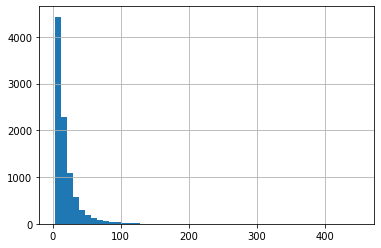

In [34]:
exploit_metro = exploit.loc[exploit['DEP'].str.len() < 3,'VALEUR']
display(exploit_metro.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]))
exploit_metro.hist(bins=50)

### Age des exploitants : Nb d'exploitation par tranche d'age du chef d'exploitation

In [35]:
e = pd.read_csv(
        zipfile.ZipFile("../../crater-data-sources/agreste/1970-2010/FDS_G_2004.zip", 'r').open('FDS_G_2004_2010.txt'),
        sep=';')
e.head(3)

/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


NOM  ANNREF FRANCE         FRDOM        REGION           DEP  \
0  G_2004    2010     FR  ............  ............  ............   
1  G_2004    2010     FR  ............  ............  ............   
2  G_2004    2010     FR  ............  ............  ............   

            COM              G_2004_DIM1  G_2004_MOD_DIM1  \
0  ............  Champ des exploitations                1   
1  ............  Champ des exploitations                1   
2  ............  Champ des exploitations                1   

                                     G_2004_LIB_DIM1  \
0  Ensemble des exploitations (hors pacages colle...   
1  Ensemble des exploitations (hors pacages colle...   
2  Ensemble des exploitations (hors pacages colle...   

                                         G_2004_DIM2  G_2004_MOD_DIM2  \
0  Âge du chef d'exp. ou du premier coexp. (tranche)                1   
1  Âge du chef d'exp. ou du premier coexp. (tranche)                1   
2  Âge du chef d'exp. ou du premier coexp. (tranche)                1   

  G_2004_LIB_DIM2 G_2004_DIM3  G_2004_MOD_DIM3  \
0        Ensemble  Indicateur                1   
1        Ensemble  Indicateur                2   
2        Ensemble  Indicateur                3   

                     G_2004_LIB_DIM3        VALEUR QUALITE  
0                      Exploitations  5.146940e+05     OUI  
1  Superficie agricole utilisée (ha)  2.708779e+07     OUI  
2     Unités de travail annuel (UTA)  7.855642e+05     OUI

In [36]:
e.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537499 entries, 0 to 1537498
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   NOM              1537499 non-null  object 
 1   ANNREF           1537499 non-null  int64  
 2   FRANCE           1537499 non-null  object 
 3   FRDOM            1537499 non-null  object 
 4   REGION           1537499 non-null  object 
 5   DEP              1537499 non-null  object 
 6   COM              1537499 non-null  object 
 7   G_2004_DIM1      1537499 non-null  object 
 8   G_2004_MOD_DIM1  1537499 non-null  int64  
 9   G_2004_LIB_DIM1  1537499 non-null  object 
 10  G_2004_DIM2      1537499 non-null  object 
 11  G_2004_MOD_DIM2  1537499 non-null  int64  
 12  G_2004_LIB_DIM2  1537499 non-null  object 
 13  G_2004_DIM3      1537499 non-null  object 
 14  G_2004_MOD_DIM3  1537499 non-null  int64  
 15  G_2004_LIB_DIM3  1537499 non-null  object 
 16  VALEUR           5

#### ID de territoires

In [115]:
e.query("COM != '............'").info(verbose=True)
e.query("COM == '............' & DEP != '............'").info(verbose=True)
e.query("DEP == '............' & REGION != '............'").info(verbose=True)
e.query("FRDOM == 'METRO' & REGION == '............'").info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530384 entries, 240 to 1537498
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   NOM              1530384 non-null  object 
 1   ANNREF           1530384 non-null  int64  
 2   FRANCE           1530384 non-null  object 
 3   FRDOM            1530384 non-null  object 
 4   REGION           1530384 non-null  object 
 5   DEP              1530384 non-null  object 
 6   COM              1530384 non-null  object 
 7   G_2004_DIM1      1530384 non-null  object 
 8   G_2004_MOD_DIM1  1530384 non-null  int64  
 9   G_2004_LIB_DIM1  1530384 non-null  object 
 10  G_2004_DIM2      1530384 non-null  object 
 11  G_2004_MOD_DIM2  1530384 non-null  int64  
 12  G_2004_LIB_DIM2  1530384 non-null  object 
 13  G_2004_DIM3      1530384 non-null  object 
 14  G_2004_MOD_DIM3  1530384 non-null  int64  
 15  G_2004_LIB_DIM3  1530384 non-null  object 
 16  VALEUR          

#### Classification sur les 3 niveaux DIM1, DIM2, DIM3

In [40]:
# Niveau DIM1
display(e.loc[:, ['G_2004_MOD_DIM1', 'G_2004_LIB_DIM1']].value_counts())

G_2004_MOD_DIM1  G_2004_LIB_DIM1                                     
1                Ensemble des exploitations (hors pacages collectifs)    608577
3                Moyennes et grandes exploitations                       525542
2                Petites exploitations                                   403380
dtype: int64

In [41]:
# Niveau DIM2
display(e.loc[:, ['G_2004_MOD_DIM2', 'G_2004_LIB_DIM2']].value_counts())

G_2004_MOD_DIM2  G_2004_LIB_DIM2
1                Ensemble           401848
4                De 50 à 59 ans     320464
3                De 40 à 49 ans     300608
5                60 ans ou plus     267272
2                Moins de 40 ans    247307
dtype: int64

In [42]:
# Niveau DIM3
display(e.loc[:, ['G_2004_MOD_DIM3', 'G_2004_LIB_DIM3']].value_counts())

G_2004_MOD_DIM3  G_2004_LIB_DIM3                            
1                Exploitations                                  385169
3                Unités de travail annuel (UTA)                 385169
4                Production brute standard (millier d'euros)    384612
2                Superficie agricole utilisée (ha)              382549
dtype: int64

#### Indicateur classes d'age
On prend la classe d'age du chef d'exploitation (et donc on comptera un nb d'exploitations, qu'on pourra rapprocher du nb total d'exploitations)

In [74]:
age = e.loc[(e['G_2004_MOD_DIM1'] == 1)
                & (e['G_2004_MOD_DIM3'] == 1)
                & (e['COM'] != '............'),:]
display(age['G_2004_LIB_DIM2'].value_counts())
age

Ensemble           35759
De 50 à 59 ans     31503
De 40 à 49 ans     30511
60 ans ou plus     27534
Moins de 40 ans    26434
Name: G_2004_LIB_DIM2, dtype: int64

NOM  ANNREF FRANCE  FRDOM REGION  DEP    COM  \
240      G_2004    2010     FR    DOM   NR01  971  97101   
244      G_2004    2010     FR    DOM   NR01  971  97101   
248      G_2004    2010     FR    DOM   NR01  971  97101   
252      G_2004    2010     FR    DOM   NR01  971  97101   
256      G_2004    2010     FR    DOM   NR01  971  97101   
...         ...     ...    ...    ...    ...  ...    ...   
1537439  G_2004    2010     FR  METRO   NR94   2B  2B361   
1537459  G_2004    2010     FR  METRO   NR94   2B  2B365   
1537463  G_2004    2010     FR  METRO   NR94   2B  2B365   
1537467  G_2004    2010     FR  METRO   NR94   2B  2B365   
1537471  G_2004    2010     FR  METRO   NR94   2B  2B365   

                     G_2004_DIM1  G_2004_MOD_DIM1  \
240      Champ des exploitations                1   
244      Champ des exploitations                1   
248      Champ des exploitations                1   
252      Champ des exploitations                1   
256      Champ des exploitations                1   
...                          ...              ...   
1537439  Champ des exploitations                1   
1537459  Champ des exploitations                1   
1537463  Champ des exploitations                1   
1537467  Champ des exploitations                1   
1537471  Champ des exploitations                1   

                                           G_2004_LIB_DIM1  \
240      Ensemble des exploitations (hors pacages colle...   
244      Ensemble des exploitations (hors pacages colle...   
248      Ensemble des exploitations (hors pacages colle...   
252      Ensemble des exploitations (hors pacages colle...   
256      Ensemble des exploitations (hors pacages colle...   
...                                                    ...   
1537439  Ensemble des exploitations (hors pacages colle...   
1537459  Ensemble des exploitations (hors pacages colle...   
1537463  Ensemble des exploitations (hors pacages colle...   
1537467  Ensemble des exploitations (hors pacages colle...   
1537471  Ensemble des exploitations (hors pacages colle...   

                                               G_2004_DIM2  G_2004_MOD_DIM2  \
240      Âge du chef d'exp. ou du premier coexp. (tranche)                1   
244      Âge du chef d'exp. ou du premier coexp. (tranche)                2   
248      Âge du chef d'exp. ou du premier coexp. (tranche)                3   
252      Âge du chef d'exp. ou du premier coexp. (tranche)                4   
256      Âge du chef d'exp. ou du premier coexp. (tranche)                5   
...                                                    ...              ...   
1537439  Âge du chef d'exp. ou du premier coexp. (tranche)                4   
1537459  Âge du chef d'exp. ou du premier coexp. (tranche)                1   
1537463  Âge du chef d'exp. ou du premier coexp. (tranche)                2   
1537467  Âge du chef d'exp. ou du premier coexp. (tranche)                3   
1537471  Âge du chef d'exp. ou du premier coexp. (tranche)                4   

         G_2004_LIB_DIM2 G_2004_DIM3  G_2004_MOD_DIM3 G_2004_LIB_DIM3  VALEUR  \
240             Ensemble  Indicateur                1   Exploitations   214.0   
244      Moins de 40 ans  Indicateur                1   Exploitations    20.0   
248       De 40 à 49 ans  Indicateur                1   Exploitations    58.0   
252       De 50 à 59 ans  Indicateur                1   Exploitations    52.0   
256       60 ans ou plus  Indicateur                1   Exploitations    84.0   
...                  ...         ...              ...             ...     ...   
1537439   De 50 à 59 ans  Indicateur                1   Exploitations     NaN   
1537459         Ensemble  Indicateur                1   Exploitations     4.0   
1537463  Moins de 40 ans  Indicateur                1   Exploitations     NaN   
1537467   De 40 à 49 ans  Indicateur                1   Exploitations     NaN   
1537471   De 50 à 59 ans  Indicateur                1   Exploitations

In [68]:
age1 = age.groupby('G_2004_LIB_DIM2')['VALEUR'].sum().reset_index()
display(age1.info(verbose=True))
age1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   G_2004_LIB_DIM2  5 non-null      object 
 1   VALEUR           5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


None

G_2004_LIB_DIM2    VALEUR
0   60 ans ou plus   83357.0
1   De 40 à 49 ans  115126.0
2   De 50 à 59 ans  139395.0
3         Ensemble  505300.0
4  Moins de 40 ans   57065.0

In [92]:
age1.loc[age1['G_2004_LIB_DIM2'] != 'Ensemble', :].style.bar()

<AxesSubplot:xlabel='G_2004_LIB_DIM2'>

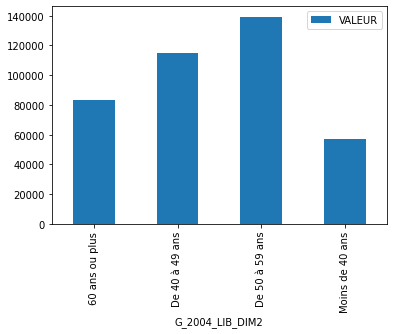

In [97]:
age2 = age1.loc[age1['G_2004_LIB_DIM2'] != 'Ensemble', :]
age2.plot.bar(x='G_2004_LIB_DIM2')


### Nb d'exploitation par taille hectare depuis FDS_G_2003

In [3]:
f = pd.read_csv(
        zipfile.ZipFile("../../crater-data-sources/agreste/1970-2010/FDS_G_2003.zip", 'r').open('FDS_G_2003_2010.txt'),
        sep=';')
f.head(3)

/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


NOM  ANNREF FRANCE         FRDOM        REGION           DEP  \
0  G_2003    2010     FR  ............  ............  ............   
1  G_2003    2010     FR  ............  ............  ............   
2  G_2003    2010     FR  ............  ............  ............   

            COM              G_2003_DIM1  G_2003_MOD_DIM1  \
0  ............  Champ des exploitations                1   
1  ............  Champ des exploitations                1   
2  ............  Champ des exploitations                1   

                                     G_2003_LIB_DIM1  \
0  Ensemble des exploitations (hors pacages colle...   
1  Ensemble des exploitations (hors pacages colle...   
2  Ensemble des exploitations (hors pacages colle...   

                              G_2003_DIM2  G_2003_MOD_DIM2 G_2003_LIB_DIM2  \
0  Superficie agricole utilisée (tranche)                1        Ensemble   
1  Superficie agricole utilisée (tranche)                1        Ensemble   
2  Superficie agricole utilisée (tranche)                1        Ensemble   

  G_2003_DIM3  G_2003_MOD_DIM3                    G_2003_LIB_DIM3  \
0  Indicateur                1                      Exploitations   
1  Indicateur                2  Superficie agricole utilisée (ha)   
2  Indicateur                3     Unités de travail annuel (UTA)   

         VALEUR QUALITE  
0  5.146940e+05     OUI  
1  2.708779e+07     OUI  
2  7.855642e+05     OUI

In [4]:
f.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440730 entries, 0 to 1440729
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   NOM              1440730 non-null  object 
 1   ANNREF           1440730 non-null  int64  
 2   FRANCE           1440730 non-null  object 
 3   FRDOM            1440730 non-null  object 
 4   REGION           1440730 non-null  object 
 5   DEP              1440730 non-null  object 
 6   COM              1440730 non-null  object 
 7   G_2003_DIM1      1440730 non-null  object 
 8   G_2003_MOD_DIM1  1440730 non-null  int64  
 9   G_2003_LIB_DIM1  1440730 non-null  object 
 10  G_2003_DIM2      1440730 non-null  object 
 11  G_2003_MOD_DIM2  1440730 non-null  int64  
 12  G_2003_LIB_DIM2  1440730 non-null  object 
 13  G_2003_DIM3      1440730 non-null  object 
 14  G_2003_MOD_DIM3  1440730 non-null  int64  
 15  G_2003_LIB_DIM3  1440730 non-null  object 
 16  VALEUR           5

#### Classification sur les 3 niveaux DIM1, DIM2, DIM3

In [9]:
# Niveau DIM1
display(f.loc[:, ['G_2003_MOD_DIM1', 'G_2003_LIB_DIM1']].drop_duplicates())

G_2003_MOD_DIM1                                    G_2003_LIB_DIM1
0                 1  Ensemble des exploitations (hors pacages colle...
24                2                              Petites exploitations
48                3                  Moyennes et grandes exploitations

In [10]:
# Niveau DIM2
display(f.loc[:, ['G_2003_MOD_DIM2', 'G_2003_LIB_DIM2']].drop_duplicates())

G_2003_MOD_DIM2                               G_2003_LIB_DIM2
0                 1                                      Ensemble
4                 2  Moins de 20 hectares (ha) y compris sans SAU
8                 3                        De 20 à moins de 50 ha
12                4                       De 50 à moins de 100 ha
16                5                      De 100 à moins de 200 ha
20                6                                200 ha ou plus

In [11]:
# Niveau DIM3
display(f.loc[:, ['G_2003_MOD_DIM3', 'G_2003_LIB_DIM3']].drop_duplicates())

G_2003_MOD_DIM3                              G_2003_LIB_DIM3
0                1                                Exploitations
1                2            Superficie agricole utilisée (ha)
2                3               Unités de travail annuel (UTA)
3                4  Production brute standard (millier d'euros)

#### Indicateur classe de taille d'exploitation en hectare

In [40]:
sau = f.loc[(f['G_2003_MOD_DIM1'] == 1)
                & (f['G_2003_MOD_DIM3'] == 1)
                & (f['G_2003_MOD_DIM2'] != 1)
                & (f['COM'] != '............'),:]
display(sau['G_2003_LIB_DIM2'].value_counts())
sau

Moins de 20 hectares (ha) y compris sans SAU    30141
De 50 à moins de 100 ha                         26098
De 100 à moins de 200 ha                        24798
De 20 à moins de 50 ha                          23325
200 ha ou plus                                  12339
Name: G_2003_LIB_DIM2, dtype: int64

NOM  ANNREF FRANCE  FRDOM REGION  DEP    COM  \
276      G_2003    2010     FR    DOM   NR01  971  97101   
280      G_2003    2010     FR    DOM   NR01  971  97101   
308      G_2003    2010     FR    DOM   NR01  971  97102   
312      G_2003    2010     FR    DOM   NR01  971  97102   
344      G_2003    2010     FR    DOM   NR01  971  97103   
...         ...     ...    ...    ...    ...  ...    ...   
1440666  G_2003    2010     FR  METRO   NR94   2B  2B361   
1440670  G_2003    2010     FR  METRO   NR94   2B  2B361   
1440694  G_2003    2010     FR  METRO   NR94   2B  2B365   
1440698  G_2003    2010     FR  METRO   NR94   2B  2B365   
1440702  G_2003    2010     FR  METRO   NR94   2B  2B365   

                     G_2003_DIM1  G_2003_MOD_DIM1  \
276      Champ des exploitations                1   
280      Champ des exploitations                1   
308      Champ des exploitations                1   
312      Champ des exploitations                1   
344      Champ des exploitations                1   
...                          ...              ...   
1440666  Champ des exploitations                1   
1440670  Champ des exploitations                1   
1440694  Champ des exploitations                1   
1440698  Champ des exploitations                1   
1440702  Champ des exploitations                1   

                                           G_2003_LIB_DIM1  \
276      Ensemble des exploitations (hors pacages colle...   
280      Ensemble des exploitations (hors pacages colle...   
308      Ensemble des exploitations (hors pacages colle...   
312      Ensemble des exploitations (hors pacages colle...   
344      Ensemble des exploitations (hors pacages colle...   
...                                                    ...   
1440666  Ensemble des exploitations (hors pacages colle...   
1440670  Ensemble des exploitations (hors pacages colle...   
1440694  Ensemble des exploitations (hors pacages colle...   
1440698  Ensemble des exploitations (hors pacages colle...   
1440702  Ensemble des exploitations (hors pacages colle...   

                                    G_2003_DIM2  G_2003_MOD_DIM2  \
276      Superficie agricole utilisée (tranche)                2   
280      Superficie agricole utilisée (tranche)                4   
308      Superficie agricole utilisée (tranche)                2   
312      Superficie agricole utilisée (tranche)                3   
344      Superficie agricole utilisée (tranche)                2   
...                                         ...              ...   
1440666  Superficie agricole utilisée (tranche)                4   
1440670  Superficie agricole utilisée (tranche)                5   
1440694  Superficie agricole utilisée (tranche)                2   
1440698  Superficie agricole utilisée (tranche)                3   
1440702  Superficie agricole utilisée (tranche)                4   

                                      G_2003_LIB_DIM2 G_2003_DIM3  \
276      Moins de 20 hectares (ha) y compris sans SAU  Indicateur   
280                           De 50 à moins de 100 ha  Indicateur   
308      Moins de 20 hectares (ha) y compris sans SAU  Indicateur   
312                            De 20 à moins de 50 ha  Indicateur   
344      Moins de 20 hectares (ha) y compris sans SAU  Indicateur   
...                                               ...         ...   
1440666                       De 50 à moins de 100 ha  Indicateur   
1440670                      De 100 à moins de 200 ha  Indicateur   
1440694  Moins de 20 hectares (ha) y compris sans SAU  Indicateur   
1440698                        De 20 à moins de 50 ha  Indicateur   
1440702                       De 50 à moins de 100 ha  Indicateur   

         G_2003_MOD_DIM3 G_2003_LIB_DIM3  VALEUR QUALITE  
276                    1   Exploitations     NaN     OUI  
280                    1   Exploitations     NaN     NON  
308                    1   Exploitations   380.0     OUI  
312                    1   

In [41]:
sau1 = sau.groupby('G_2003_LIB_DIM2')['VALEUR'].sum().reset_index()
display(sau1.info(verbose=True))
sau1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   G_2003_LIB_DIM2  5 non-null      object 
 1   VALEUR           5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


None

G_2003_LIB_DIM2    VALEUR
0                                200 ha ou plus    5641.0
1                      De 100 à moins de 200 ha   42633.0
2                        De 20 à moins de 50 ha   56534.0
3                       De 50 à moins de 100 ha   64877.0
4  Moins de 20 hectares (ha) y compris sans SAU  182395.0

In [43]:
sau2 = sau1.reindex([4, 2, 3, 1, 0])
sau2

G_2003_LIB_DIM2    VALEUR
4  Moins de 20 hectares (ha) y compris sans SAU  182395.0
2                        De 20 à moins de 50 ha   56534.0
3                       De 50 à moins de 100 ha   64877.0
1                      De 100 à moins de 200 ha   42633.0
0                                200 ha ou plus    5641.0

In [45]:
sau2.loc[sau2['G_2003_LIB_DIM2'] != 'Ensemble', :].style.bar()

<AxesSubplot:xlabel='G_2003_LIB_DIM2'>

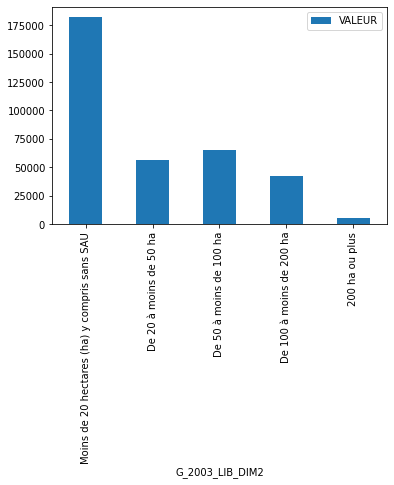

In [46]:
sau3 = sau2.loc[sau2['G_2003_LIB_DIM2'] != 'Ensemble', :]
sau3.plot.bar(x='G_2003_LIB_DIM2')

### Nb d'exploitation par taille hectare depuis FDS_G_2047

In [16]:
g = pd.read_csv(
        zipfile.ZipFile("../../crater-data-sources/agreste/1970-2010/FDS_G_2047.zip", 'r').open('FDS_G_2047_2010.txt'),
        sep=';')
g.head(3)

/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


NOM  ANNREF FRANCE         FRDOM        REGION           DEP  \
0  G_2047    2010     FR  ............  ............  ............   
1  G_2047    2010     FR  ............  ............  ............   
2  G_2047    2010     FR  ............  ............  ............   

            COM              G_2047_DIM1  G_2047_MOD_DIM1  \
0  ............  Champ des exploitations                1   
1  ............  Champ des exploitations                1   
2  ............  Champ des exploitations                1   

                                     G_2047_LIB_DIM1  \
0  Ensemble des exploitations (hors pacages colle...   
1  Ensemble des exploitations (hors pacages colle...   
2  Ensemble des exploitations (hors pacages colle...   

                    G_2047_DIM2  G_2047_MOD_DIM2 G_2047_LIB_DIM2 G_2047_DIM3  \
0  Superficie agricole utilisée                1        Ensemble  Indicateur   
1  Superficie agricole utilisée                1        Ensemble  Indicateur   
2  Superficie agricole utilisée                1        Ensemble  Indicateur   

   G_2047_MOD_DIM3                                    G_2047_LIB_DIM3  \
0                1                  Nombre d'exploitations concernées   
1                2                  Superficie agricole utilisée (ha)   
2                3  Volume de travail des exploitations concernées...   

         VALEUR QUALITE  
0  5.146940e+05     OUI  
1  2.708779e+07     OUI  
2  7.855642e+05     OUI

In [17]:
g.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007732 entries, 0 to 3007731
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   NOM              object 
 1   ANNREF           int64  
 2   FRANCE           object 
 3   FRDOM            object 
 4   REGION           object 
 5   DEP              object 
 6   COM              object 
 7   G_2047_DIM1      object 
 8   G_2047_MOD_DIM1  int64  
 9   G_2047_LIB_DIM1  object 
 10  G_2047_DIM2      object 
 11  G_2047_MOD_DIM2  int64  
 12  G_2047_LIB_DIM2  object 
 13  G_2047_DIM3      object 
 14  G_2047_MOD_DIM3  int64  
 15  G_2047_LIB_DIM3  object 
 16  VALEUR           float64
 17  QUALITE          object 
dtypes: float64(1), int64(4), object(13)
memory usage: 413.0+ MB


#### Classification sur les 3 niveaux DIM1, DIM2, DIM3

In [19]:
# Niveau DIM1
display(g.loc[:, ['G_2047_MOD_DIM1', 'G_2047_LIB_DIM1']].drop_duplicates())

G_2047_MOD_DIM1                                    G_2047_LIB_DIM1
0                  1  Ensemble des exploitations (hors pacages colle...
72                 2                              Petites exploitations
144                3                  Moyennes et grandes exploitations

In [20]:
# Niveau DIM2
display(g.loc[:, ['G_2047_MOD_DIM2', 'G_2047_LIB_DIM2']].drop_duplicates())

G_2047_MOD_DIM2                            G_2047_LIB_DIM2
0                 1                                   Ensemble
4                 2  SAU inférieure à 5 ha, y compris sans SAU
8                 3                  SAU de 5 à moins de 20 ha
12                4                 SAU de 20 à moins de 35 ha
16                5                 SAU de 35 à moins de 50 ha
20                6                 SAU de 50 à moins de 75 ha
24                7                SAU de 75 à moins de 100 ha
28                8               SAU de 100 à moins de 125 ha
32                9               SAU de 125 à moins de 150 ha
36               10               SAU de 150 à moins de 200 ha
40               11               SAU de 200 à moins de 300 ha
44               12                      SAU de 300 ha ou plus
48               13                      SAU inférieure à 1 ha
52               14                   SAU de 1 à moins de 2 ha
56               15                   SAU de 2 à moins de 5 ha
60               16                  SAU de 5 à moins de 10 ha
64               17                 SAU de 10 à moins de 20 ha
68               18                       SAU de 20 ha ou plus

In [21]:
# Niveau DIM3
display(g.loc[:, ['G_2047_MOD_DIM3', 'G_2047_LIB_DIM3']].drop_duplicates())

G_2047_MOD_DIM3                                    G_2047_LIB_DIM3
0                1                  Nombre d'exploitations concernées
1                2                  Superficie agricole utilisée (ha)
2                3  Volume de travail des exploitations concernées...
3                4        Production brute standard (millier d'euros)

#### Indicateur classe de taille d'exploitation en hectare

In [24]:
sau_bis = g.loc[(g['G_2047_MOD_DIM1'] == 1)
                & (g['G_2047_MOD_DIM2'] != 1)
                & (g['G_2047_MOD_DIM3'] == 1)
                & (g['COM'] != '............'),:]
display(sau_bis['G_2047_LIB_DIM2'].value_counts())
sau_bis

SAU de 20 ha ou plus                         34226
SAU inférieure à 5 ha, y compris sans SAU    25824
SAU de 5 à moins de 20 ha                    23742
SAU de 50 à moins de 75 ha                   20630
SAU de 2 à moins de 5 ha                     19515
SAU de 75 à moins de 100 ha                  18901
SAU de 10 à moins de 20 ha                   18334
SAU de 20 à moins de 35 ha                   18086
SAU de 5 à moins de 10 ha                    17468
SAU de 35 à moins de 50 ha                   16935
SAU de 100 à moins de 125 ha                 16429
SAU de 150 à moins de 200 ha                 13902
SAU inférieure à 1 ha                        13689
SAU de 125 à moins de 150 ha                 12772
SAU de 1 à moins de 2 ha                     12527
SAU de 200 à moins de 300 ha                 10381
SAU de 300 ha ou plus                         4156
Name: G_2047_LIB_DIM2, dtype: int64

NOM  ANNREF FRANCE  FRDOM REGION  DEP    COM  \
820      G_2047    2010     FR    DOM   NR01  971  97101   
824      G_2047    2010     FR    DOM   NR01  971  97101   
828      G_2047    2010     FR    DOM   NR01  971  97101   
832      G_2047    2010     FR    DOM   NR01  971  97101   
836      G_2047    2010     FR    DOM   NR01  971  97101   
...         ...     ...    ...    ...    ...  ...    ...   
3007676  G_2047    2010     FR  METRO   NR94   2B  2B365   
3007680  G_2047    2010     FR  METRO   NR94   2B  2B365   
3007684  G_2047    2010     FR  METRO   NR94   2B  2B365   
3007688  G_2047    2010     FR  METRO   NR94   2B  2B365   
3007692  G_2047    2010     FR  METRO   NR94   2B  2B365   

                     G_2047_DIM1  G_2047_MOD_DIM1  \
820      Champ des exploitations                1   
824      Champ des exploitations                1   
828      Champ des exploitations                1   
832      Champ des exploitations                1   
836      Champ des exploitations                1   
...                          ...              ...   
3007676  Champ des exploitations                1   
3007680  Champ des exploitations                1   
3007684  Champ des exploitations                1   
3007688  Champ des exploitations                1   
3007692  Champ des exploitations                1   

                                           G_2047_LIB_DIM1  \
820      Ensemble des exploitations (hors pacages colle...   
824      Ensemble des exploitations (hors pacages colle...   
828      Ensemble des exploitations (hors pacages colle...   
832      Ensemble des exploitations (hors pacages colle...   
836      Ensemble des exploitations (hors pacages colle...   
...                                                    ...   
3007676  Ensemble des exploitations (hors pacages colle...   
3007680  Ensemble des exploitations (hors pacages colle...   
3007684  Ensemble des exploitations (hors pacages colle...   
3007688  Ensemble des exploitations (hors pacages colle...   
3007692  Ensemble des exploitations (hors pacages colle...   

                          G_2047_DIM2  G_2047_MOD_DIM2  \
820      Superficie agricole utilisée                2   
824      Superficie agricole utilisée                3   
828      Superficie agricole utilisée                6   
832      Superficie agricole utilisée               13   
836      Superficie agricole utilisée               14   
...                               ...              ...   
3007676  Superficie agricole utilisée                5   
3007680  Superficie agricole utilisée                6   
3007684  Superficie agricole utilisée                7   
3007688  Superficie agricole utilisée               17   
3007692  Superficie agricole utilisée               18   

                                   G_2047_LIB_DIM2 G_2047_DIM3  \
820      SAU inférieure à 5 ha, y compris sans SAU  Indicateur   
824                      SAU de 5 à moins de 20 ha  Indicateur   
828                     SAU de 50 à moins de 75 ha  Indicateur   
832                          SAU inférieure à 1 ha  Indicateur   
836                       SAU de 1 à moins de 2 ha  Indicateur   
...                                            ...         ...   
3007676                 SAU de 35 à moins de 50 ha  Indicateur   
3007680                 SAU de 50 à moins de 75 ha  Indicateur   
3007684                SAU de 75 à moins de 100 ha  Indicateur   
3007688                 SAU de 10 à moins de 20 ha  Indicateur   
3007692                       SAU de 20 ha ou plus  Indicateur   

         G_2047_MOD_DIM3                    G_2047_LIB_DIM3  VALEUR QUALITE  
820                    1  Nombre d'exploitations concernées   154.0     OUI  
824                    1  Nombre d'exploitations concernées     NaN     OUI  
828                    1  Nombre d'exploitations concernées     NaN     NON  
832                    1  Nombre d'exploitations concernées    46.0     OUI  
836                    1  Nom

In [25]:
sau_bis1 = sau_bis.groupby('G_2047_LIB_DIM2')['VALEUR'].sum().reset_index()
display(sau_bis1.info(verbose=True))
sau_bis1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   G_2047_LIB_DIM2  17 non-null     object 
 1   VALEUR           17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


None

G_2047_LIB_DIM2    VALEUR
0                    SAU de 1 à moins de 2 ha   15485.0
1                  SAU de 10 à moins de 20 ha   20984.0
2                SAU de 100 à moins de 125 ha   12117.0
3                SAU de 125 à moins de 150 ha    5648.0
4                SAU de 150 à moins de 200 ha    7590.0
5                    SAU de 2 à moins de 5 ha   32452.0
6                        SAU de 20 ha ou plus  197654.0
7                  SAU de 20 à moins de 35 ha   27535.0
8                SAU de 200 à moins de 300 ha    3844.0
9                       SAU de 300 ha ou plus     625.0
10                 SAU de 35 à moins de 50 ha   22926.0
11                  SAU de 5 à moins de 10 ha   20694.0
12                  SAU de 5 à moins de 20 ha   58903.0
13                 SAU de 50 à moins de 75 ha   36952.0
14                SAU de 75 à moins de 100 ha   21614.0
15                      SAU inférieure à 1 ha   22971.0
16  SAU inférieure à 5 ha, y compris sans SAU   92904.0

In [32]:
sau_bis2 = sau_bis1.reindex([16, 15, 0, 5, 11, 1, 7, 10, 13, 14, 2, 3, 4, 8, 9])
sau_bis2

G_2047_LIB_DIM2   VALEUR
16  SAU inférieure à 5 ha, y compris sans SAU  92904.0
15                      SAU inférieure à 1 ha  22971.0
0                    SAU de 1 à moins de 2 ha  15485.0
5                    SAU de 2 à moins de 5 ha  32452.0
11                  SAU de 5 à moins de 10 ha  20694.0
1                  SAU de 10 à moins de 20 ha  20984.0
7                  SAU de 20 à moins de 35 ha  27535.0
10                 SAU de 35 à moins de 50 ha  22926.0
13                 SAU de 50 à moins de 75 ha  36952.0
14                SAU de 75 à moins de 100 ha  21614.0
2                SAU de 100 à moins de 125 ha  12117.0
3                SAU de 125 à moins de 150 ha   5648.0
4                SAU de 150 à moins de 200 ha   7590.0
8                SAU de 200 à moins de 300 ha   3844.0
9                       SAU de 300 ha ou plus    625.0

In [33]:
sau_bis2.style.bar()

<AxesSubplot:xlabel='G_2047_LIB_DIM2'>

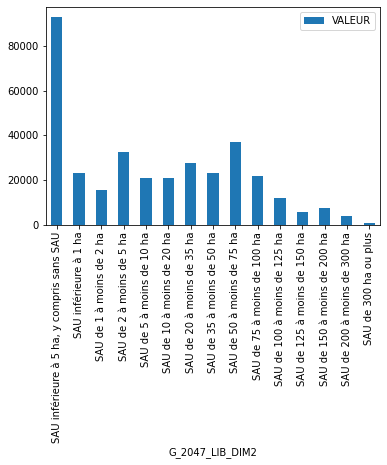

In [36]:
sau_bis3 = sau_bis2.loc[sau_bis2['G_2047_LIB_DIM2'] != 'Ensemble', :]
sau_bis3.plot.bar(x='G_2047_LIB_DIM2')